In [48]:
from importlib.metadata import files

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np

# Import data
import numpy as np
import pandas as pd

apples = pd.read_csv('/Users/alexa/Documents/git py analysis/Apple Stocks/02-data/AppleStockPrices.csv')
print(apples.columns)
from desc_exp_values import mean_frame, median_frame, range_frame, var_frame, SD_frame

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')


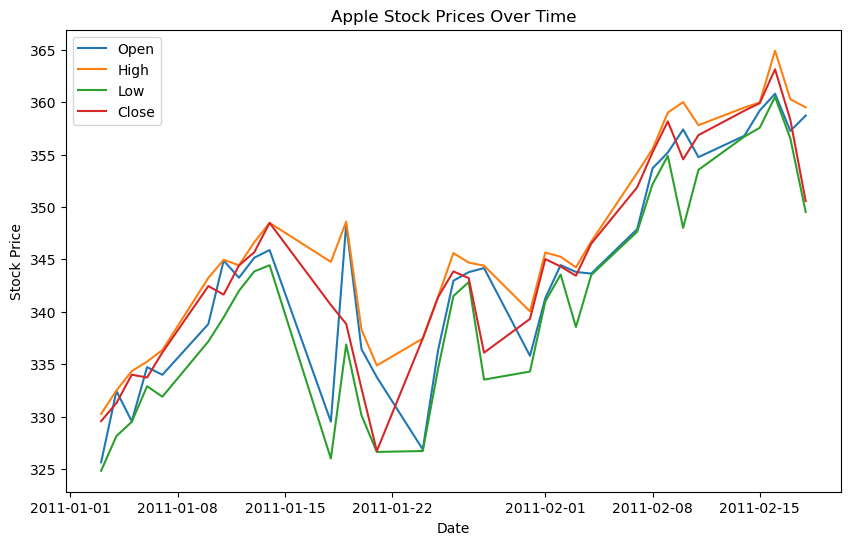

In [49]:
# Line plot for each column so we can explore the data
date = apples['Date']
open_a = apples['Open']
high = apples['High']
low = apples['Low']
close = apples['Close']
volume = apples['Volume']

# Convert date column to date_time
apples['Date'] = pd.to_datetime(apples['Date'])

# Set 'Date' as the index to make it easier for plotting
apples.set_index('Date', inplace=True)

# Plotting the data
plt.figure(figsize=(10, 6))  # Set the figure size for better readability

# Plot different columns
plt.plot(apples.index, apples['Open'], label='Open')
plt.plot(apples.index, apples['High'], label='High')
plt.plot(apples.index, apples['Low'], label='Low')
plt.plot(apples.index, apples['Close'], label='Close')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Apple Stock Prices Over Time')
plt.legend()  # Adds a legend to differentiate the lines

# Display the plot
plt.show()

**Observations and questions**
- Do low's and high's correlate?
- Open seems to shoot down before a sharp rise?
    - Below previous close
    - Crossing over close on the way down
    - Seems to be periods with the biggest gap between high and low
    - e.g. ~01/05, 01/10, 01/22, 01/30, 02/03, 02/10
    - Is this a pattern that we can test?
- Periods of rise appear to have few fluctuations
    - 01/01 - 01/15 and 02/01 - 02/15
- Open is almost always higher than the low
- Open is almost always lower than the high

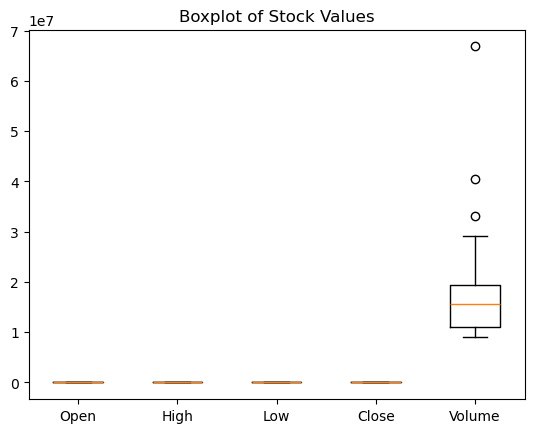

In [50]:
# Create boxplots for the main 5 columns

# Select the columns 
data = [apples['Open'], apples['High'], apples['Low'], apples['Close'], apples['Volume']]

# Create boxplots 
fig, ax = plt.subplots()
BP = ax.boxplot(data)

# Add titles and labels
ax.set_title("Boxplot of Stock Values")
ax.set_xticklabels(['Open', 'High', 'Low', 'Close', 'Volume'])

# Show the plot
plt.show()

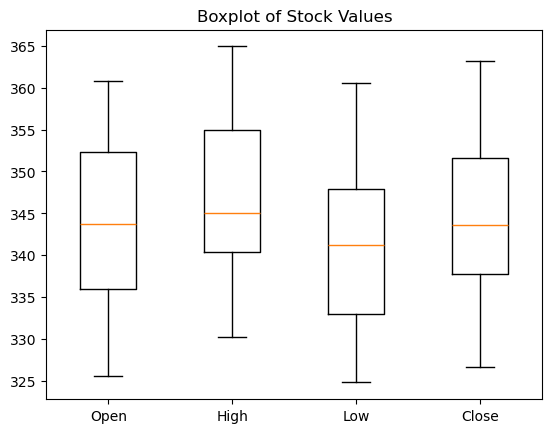

In [51]:
# With Volume removed
 
data = [apples['Open'], apples['High'], apples['Low'], apples['Close']]

# Create boxplots 
fig, ax = plt.subplots()
BP = ax.boxplot(data)

# Add titles and labels
ax.set_title("Boxplot of Stock Values")
ax.set_xticklabels(['Open', 'High', 'Low', 'Close'])

# Show the plot
plt.show()

**Notes**
- Doesn't appear to be much difference between each column
-  Median High seems to have some high values 
- All plots have whiskers either side

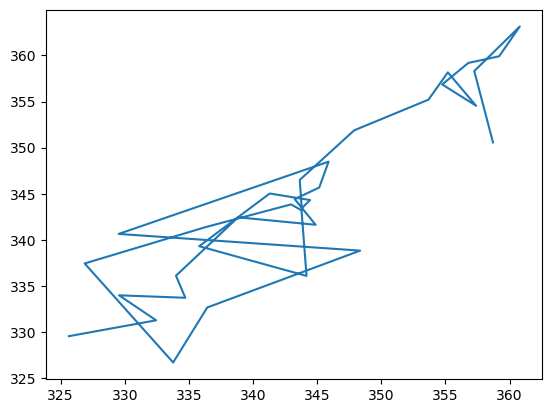

In [52]:
interaction_var_1 = open_a
interaction_var_2 = close

plt.plot(interaction_var_1, interaction_var_2)
plt.show()